## K-Means Clustering
K-Means is an unsupervised machine learning algorithm used for clustering data into groups (clusters). The algorithm partitions data points into \( k \) clusters by:
1. Initializing \( k \) centroids randomly.
2. Assigning each data point to the nearest centroid.
3. Recomputing centroids based on the assigned points.
4. Repeating steps 2 and 3 until convergence.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

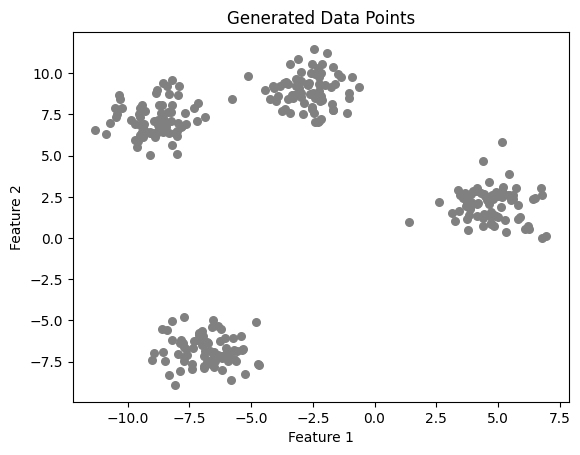

In [8]:
# Generating synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Visualizing the data
plt.scatter(X[:, 0], X[:, 1], s=30, c='gray')
plt.title("Generated Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## The Elbow Method
Choosing the correct number of clusters (\( k \)) is critical for effective clustering. The Elbow Method helps us find this optimal \( k \) by:
1. Running the K-Means algorithm with varying \( k \) values.
2. Calculating the **Within-Cluster Sum of Squares (WCSS)** for each \( k \). WCSS is a measure of the compactness of clusters, meaning how close data points in each cluster are to the cluster's centroid.
3. Plotting \( k \) against the corresponding WCSS values.

### Why "Elbow"?
The WCSS generally decreases as \( k \) increases, because adding more clusters can always reduce the distance within clusters. However, after a certain point, increasing \( k \) offers diminishing returns: the WCSS reduction becomes minimal. The "elbow" point on the plot is where this reduction rate sharply changes, and it suggests a balance between compact clusters and a reasonable number of clusters.


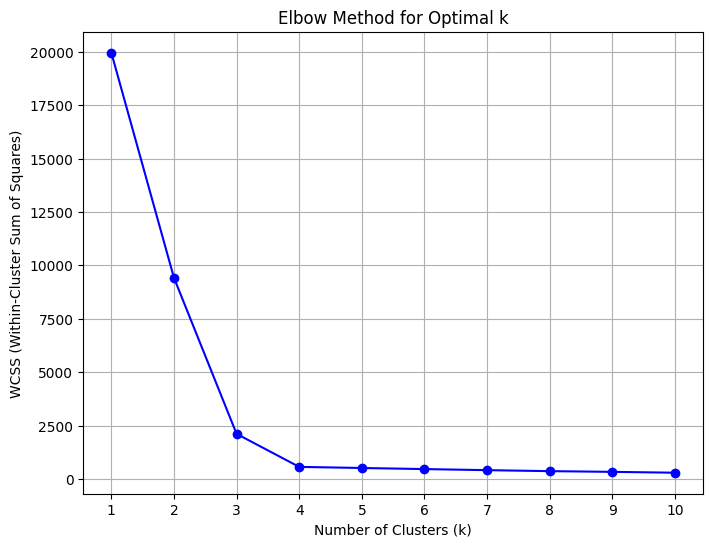

In [9]:
# Elbow Method to determine the optimal k
wcss = []
max_clusters = 10  # You can adjust the range of clusters to test
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()


### How to Use the Plot
1. Observe the plot generated above.
2. Find the "elbow point," where the WCSS value's decrease slows down significantly. This elbow typically indicates the optimal number of clusters.

For example, if the elbow is around \( k = 4 \), we can choose 4 clusters for our K-Means algorithm.


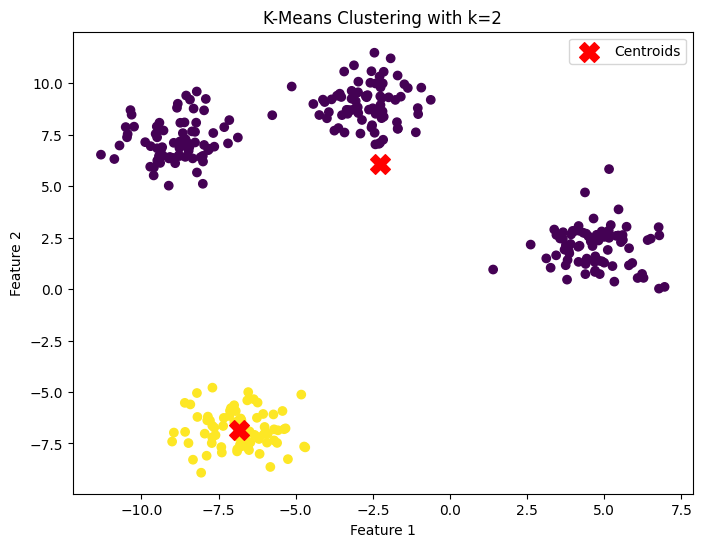

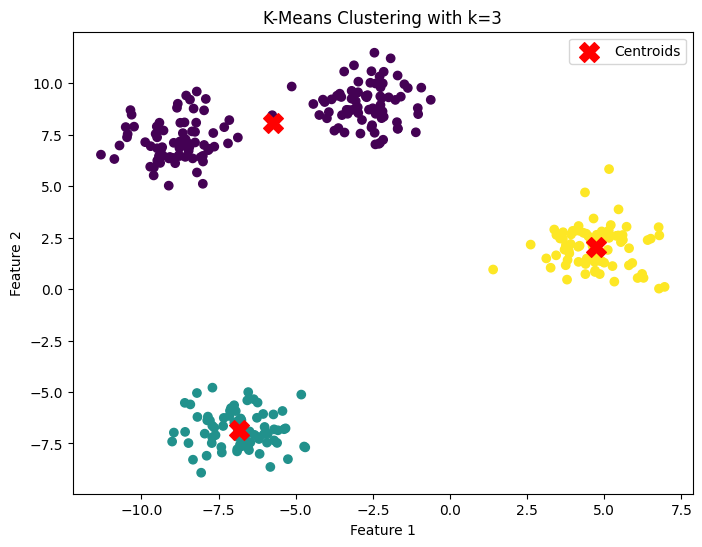

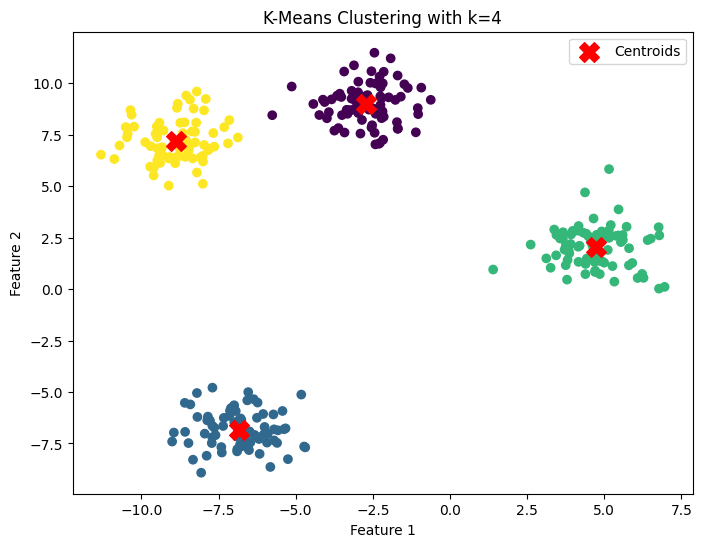

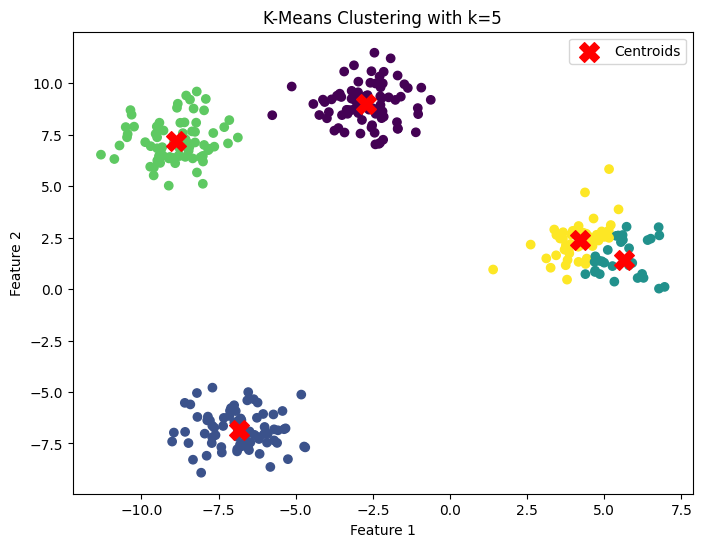

In [10]:
k_values = [2, 3, 4, 5]  # Adjust k-values as needed

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    
    # Plot each clustering result
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
    plt.title(f"K-Means Clustering with k={k}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


#### Implementing K-Means with Optimal Clusters

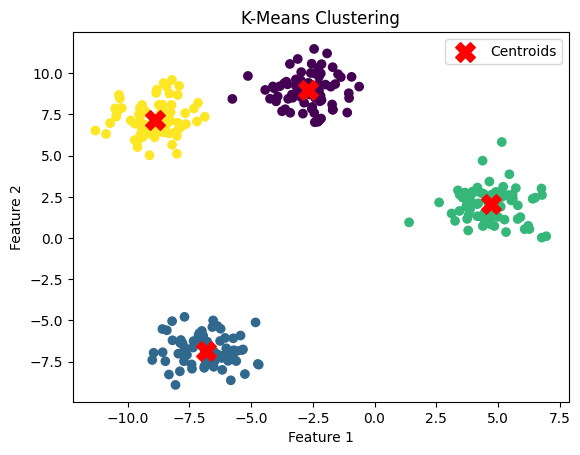

In [11]:
# Choosing optimal clusters (let's assume 4 from the elbow method)
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the Clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

#### Interpretation of the Results

The data points are grouped into clusters based on their proximity to the centroids. Each cluster represents a group of similar points, and the centroids are the central points of each cluster. The red markers indicate the centroids found by the K-Means algorithm.


#### Predicting new data points

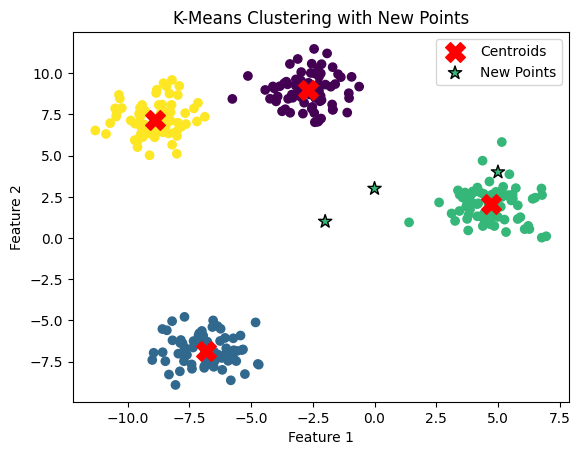

In [12]:
# Predicting the cluster for new data points
new_points = np.array([[0, 3], [-2, 1], [5, 4]])
predictions = kmeans.predict(new_points)

# Visualize data points with cluster predictions for new points
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')

# Map predictions to colors
colors = plt.cm.viridis(np.linspace(0, 1, len(np.unique(y_kmeans))))
new_point_colors = [colors[label] for label in predictions]

# Color new points based on their predicted clusters
plt.scatter(new_points[:, 0], new_points[:, 1], s=100, c=new_point_colors, marker='*', edgecolor='k', label='New Points')
plt.title("K-Means Clustering with New Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()